In [1]:
# import modules
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import netCDF4 as nc4
from datetime import datetime
from scipy.io import netcdf
from netCDF4 import Dataset

%matplotlib inline

/home/alberta/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
ds36=xr.open_dataset('/mnt/alberta/equipes/IGE/meom/workdir/albert/GS36.L75/GS36.L75-I/GS36_coordinates.nc') 
ds12=xr.open_dataset('/mnt/alberta/equipes/IGE/meom/workdir/albert/NACHOS12.L75/NACHOS12.L75-I/GS12.L75_mesh_mask.nc')


In [3]:
ds36


<xarray.Dataset>
Dimensions:       (time_counter: 1, x: 1468, y: 950)
Coordinates:
  * time_counter  (time_counter) float64 1e+11
Dimensions without coordinates: x, y
Data variables:
    e1f           (time_counter, y, x) float32 ...
    e1t           (time_counter, y, x) float32 ...
    e1u           (time_counter, y, x) float32 ...
    e1v           (time_counter, y, x) float32 ...
    e2f           (time_counter, y, x) float32 ...
    e2t           (time_counter, y, x) float32 ...
    e2u           (time_counter, y, x) float32 ...
    e2v           (time_counter, y, x) float32 ...
    glamf         (time_counter, y, x) float32 ...
    glamt         (time_counter, y, x) float32 ...
    glamu         (time_counter, y, x) float32 ...
    glamv         (time_counter, y, x) float32 ...
    gphif         (time_counter, y, x) float32 ...
    gphit         (time_counter, y, x) float32 ...
    gphiu         (time_counter, y, x) float32 ...
    gphiv         (time_counter, y, x) float32 ...
 

In [4]:
ds12

<xarray.Dataset>
Dimensions:       (time_counter: 1, x: 503, y: 318)
Coordinates:
  * time_counter  (time_counter) float64 0.0
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    e1f           (time_counter, y, x) float32 ...
    e1t           (time_counter, y, x) float32 ...
    e1u           (time_counter, y, x) float32 ...
    e1v           (time_counter, y, x) float32 ...
    e2f           (time_counter, y, x) float32 ...
    e2t           (time_counter, y, x) float32 ...
    e2u           (time_counter, y, x) float32 ...
    e2v           (time_counter, y, x) float32 ...
    e3t_0         (time_counter, y, x) float32 ...
    e3u_0         (time_counter, y, x) float32 ...
    e3v_0         (time_counter, y, x) float32 ...
    e3w_0         (time_counter, y, x) float32 ...
    ff_f          (time_counter, y, x) float32 ...
    ff_t          (time_counter, y, x) float32 ...
    fmask         (time_counter,

In [15]:
latN36=ds36.nav_lat[949,:] 
latS36=ds36.nav_lat[0,:] 

In [14]:
len(latS36)

1468

In [6]:
latN12=ds12.nav_lat[317,:] 
latS12=ds12.nav_lat[0,:] 

In [7]:
print(latN36.values)

[46.16927  46.170525 46.171783 ... 47.98437  47.985058 47.98574 ]


In [8]:
print(latN12.values)

[46.101315 46.10498  46.108635 46.112316 46.116    46.119686 46.12339
 46.12709  46.130802 46.134525 46.138252 46.14198  46.14572  46.149467
 46.153217 46.156975 46.160744 46.164516 46.168297 46.17209  46.175877
 46.179676 46.183487 46.187298 46.19112  46.194946 46.19878  46.202614
 46.20646  46.21031  46.21417  46.218033 46.2219   46.225777 46.22966
 46.233547 46.237442 46.24134  46.245235 46.24915  46.253067 46.256996
 46.260918 46.264862 46.26879  46.27273  46.276688 46.280647 46.2846
 46.288574 46.29254  46.296524 46.300507 46.304493 46.308483 46.312485
 46.31649  46.320496 46.32451  46.32853  46.332554 46.336586 46.34061
 46.34465  46.34869  46.352737 46.356792 46.36085  46.364906 46.368977
 46.373043 46.377113 46.381187 46.38528  46.389362 46.39346  46.397556
 46.401657 46.40576  46.409866 46.41398  46.4181   46.42222  46.42634
 46.430466 46.434597 46.438732 46.442867 46.447014 46.451157 46.45531
 46.459465 46.463615 46.46778  46.471947 46.476112 46.480286 46.484463
 46.488632 46

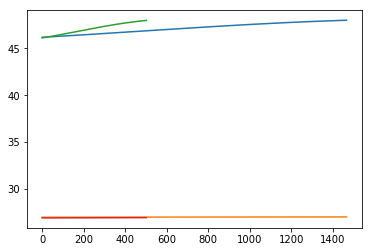

In [9]:
plt.plot(latN36)
plt.plot(latS36)
plt.plot(latN12)
plt.plot(latS12)

In [16]:
dx36=np.arange(0,len(latN36),1)

In [17]:
dx12=np.arange(0,len(latN36),3)

In [19]:
len(dx12)

490

In [20]:
len(latS12)

503

ValueError: x and y must have same first dimension, but have shapes (490,) and (503,)

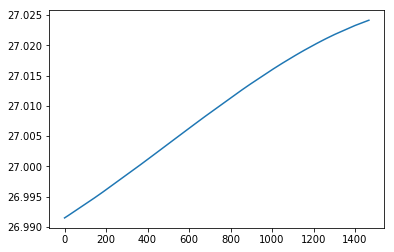

In [18]:
#plt.plot(dx36,latN36)
plt.plot(dx36,latS36)
#plt.plot(dx12,latN12)
plt.plot(dx12,latS12)

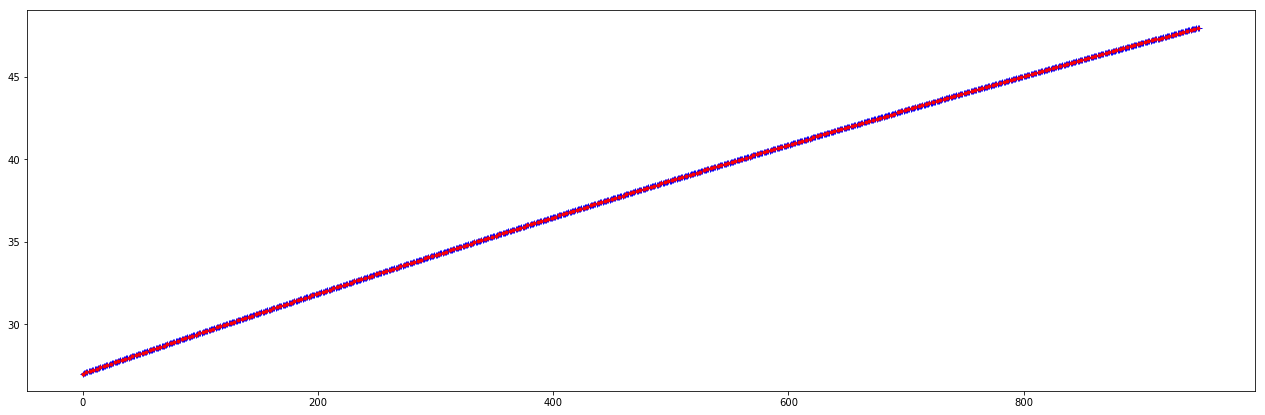

In [13]:
latW36=ds36.nav_lat[:,1467] 
latW12=ds12.nav_lat[:,502] 
dx36=np.arange(0,len(latW36),1)
dx12=np.arange(0,len(latW36),3)
fig = plt.figure(figsize=(22,7))
plt.plot(dx36,latW36,'b+')
plt.plot(dx12,latW12,'r.')

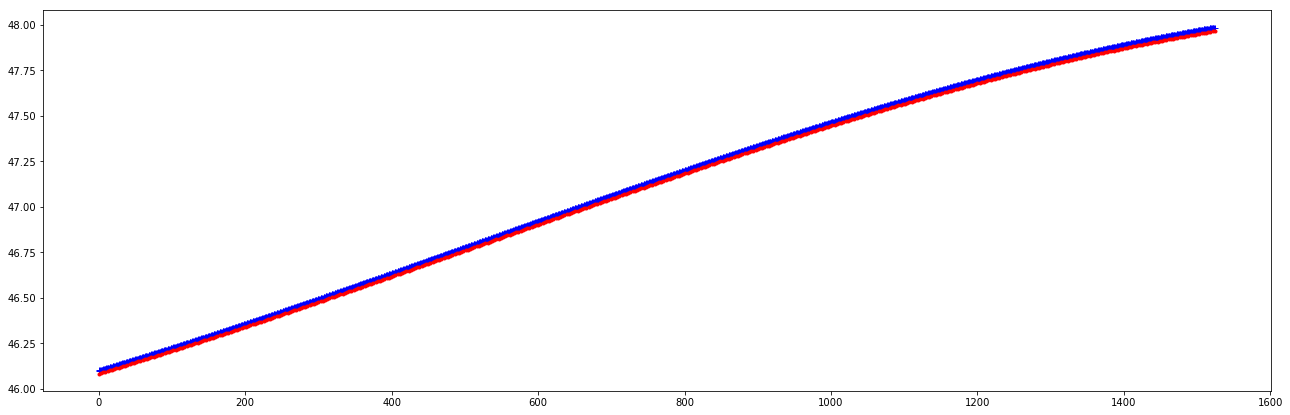

In [14]:
latN36=ds36.nav_lat[949,:] 
latN12=ds12.nav_lat[317,:] 
dx36=np.arange(0,len(latN36),1)
dx12=np.arange(0,len(latN36),3)
fig = plt.figure(figsize=(22,7))
plt.plot(dx36,latN36,'b+')
plt.plot(dx12,latN12,'r.')

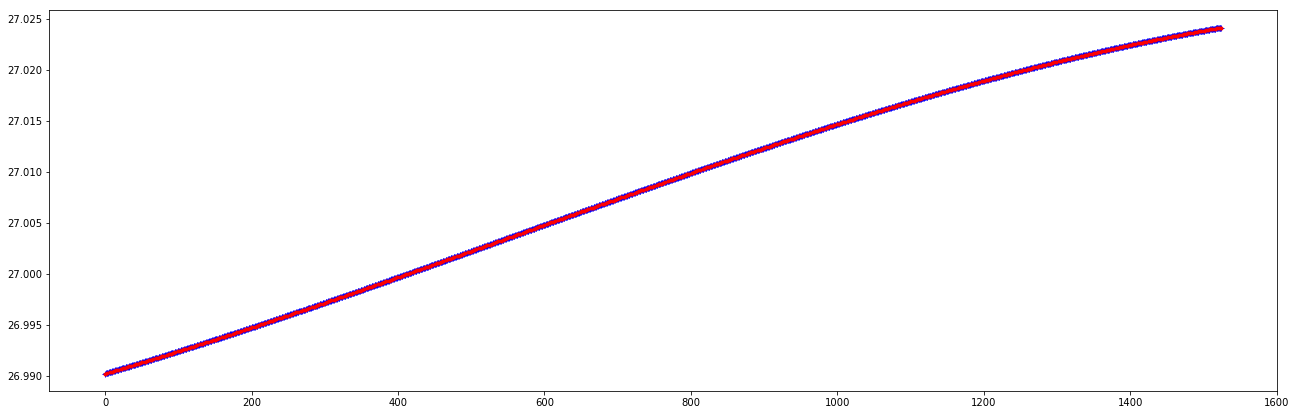

In [15]:
latS36=ds36.nav_lat[0,:] 
latS12=ds12.nav_lat[0,:] 
dx36=np.arange(0,len(latS36),1)
dx12=np.arange(0,len(latS36),3)
fig = plt.figure(figsize=(22,7))
plt.plot(dx36,latS36,'b+')
plt.plot(dx12,latS12,'r.')

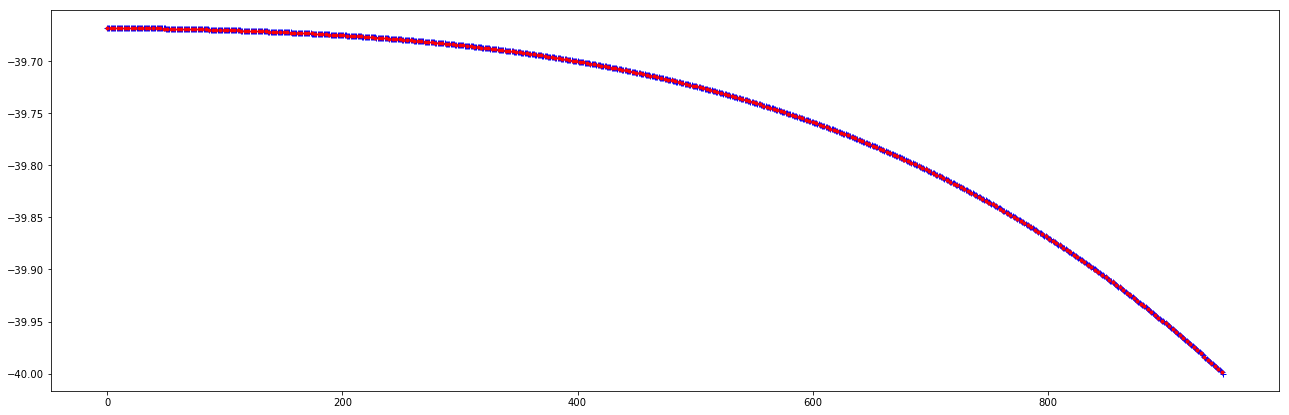

In [16]:
latW36=ds36.nav_lon[:,1467] 
latW12=ds12.nav_lon[:,502] 
dx36=np.arange(0,len(latW36),1)
dx12=np.arange(0,len(latW36),3)
fig = plt.figure(figsize=(22,7))
plt.plot(dx36,latW36,'b+')
plt.plot(dx12,latW12,'r.')

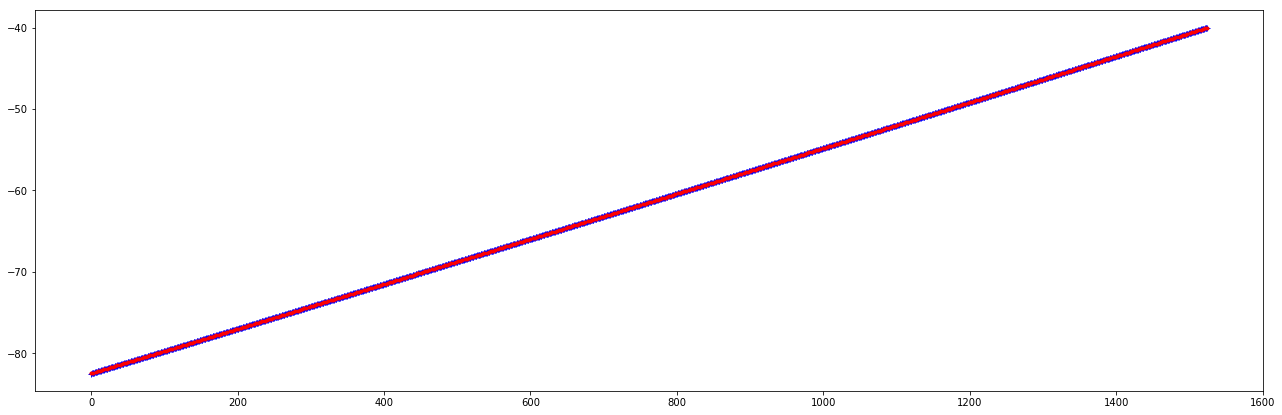

In [17]:
latN36=ds36.nav_lon[949,:] 
latN12=ds12.nav_lon[316,:] 
dx36=np.arange(0,len(latN36),1)
dx12=np.arange(0,len(latN36),3)
fig = plt.figure(figsize=(22,7))
plt.plot(dx36,latN36,'b+')
plt.plot(dx12,latN12,'r.')

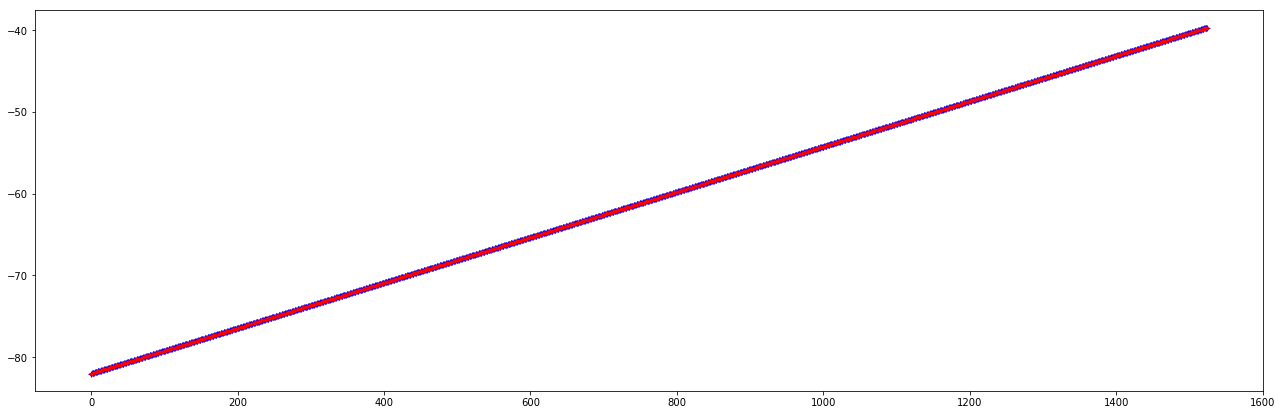

In [18]:
latS36=ds36.nav_lon[0,:] 
latS12=ds12.nav_lon[0,:] 
dx36=np.arange(0,len(latS36),1)
dx12=np.arange(0,len(latS36),3)
fig = plt.figure(figsize=(22,7))
plt.plot(dx36,latS36,'b+')
plt.plot(dx12,latS12,'r.')